Raghutam Hombal<br>2K20E22
### Template Matching
Importing Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Reading the images and converting them to grayscale image

In [2]:
target = cv2.imread("church.png")
target = cv2.cvtColor(target,cv2.COLOR_BGR2GRAY)
template = cv2.imread("window.png")
template = cv2.cvtColor(template,cv2.COLOR_BGR2GRAY)

Function to Threshold the values, here I have even inverted the condition as the template that was supposed to be matched was black in color, but white would have made the math easier

In [3]:
def thresholder(img,t):
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i][j] > t:
                img[i][j] = 0
            else:
                img[i][j] = 255

    return img

<b>Princple used for going by the problem</b><br>We find the location of the object by placing the template on image and mulitplying the corresponding pixel values with the taget and summing it. This is repeated for the whole image and a new matrix is formed which shows a kind of correlation amongst the pixels of target and the template. The index of the maximum value of the new matrix, corresponds to the location in the picture where the template matches the most

In [293]:
def location_finder(target,template):
    loc=np.zeros(target.shape)
    template_mean = np.mean(np.mean(template))
    delta_template = template-template_mean
    for i in range(0,target.shape[0]-template_size[0]):
        for j in range(0,target.shape[1]-template_size[1]):
            #loc[i+int(template_size[0]/2)][j+int(template_size[1]/2)] = np.sum(target[i:i+template_size[0],j:j+template_size[1]]*template)
            #loc[i+int(template_size[0]/2)][j+int(template_size[1]/2)] = np.sum((target[i:i+template_size[0],j:j+template_size[1]]-np.mean(np.mean(target[i:i+template_size[0],j:j+template_size[1]])))*(template[:,:]-np.mean(np.mean(template[:,:]))))
            loc[i+int(template_size[0]/2)][j+int(template_size[1]/2)] = np.sum((np.mean(np.mean(target[i:i+template_size[0],j:j+template_size[1]]))-target[i:i+template_size[0],j:j+template_size[1]])*delta_template)/np.sqrt(np.std(target[i:i+template_size[0],j:j+template_size[1]])**2*np.std(delta_template)**2)
    plt.imshow(loc,cmap='gray')
    plt.title("Location Matrix")
    plt.show()
    return loc


Calling the functions in order to acheive results

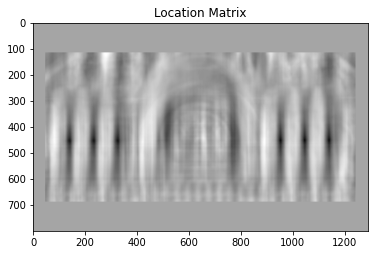

In [5]:
template_size = template.shape
#target = thresholder(target,100)
#template = thresholder(template,100)
location = location_finder(target.copy(),template.copy())

In [6]:
#for i in range(len(location)+1):
#    print("Object",i," is at location => ",location[1][i],",",location[0][i])

In [7]:
location

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
np.amin(location)

-21470.0

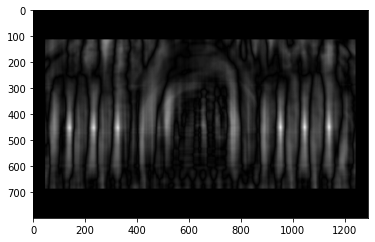

In [9]:
plt.imshow(np.abs(location),cmap='gray')

In [10]:
y,x=np.nonzero(np.logical_and(np.abs(location)>np.amax(np.abs(location))*0.85,np.abs(location)<np.amax(np.abs(location))*0.86))

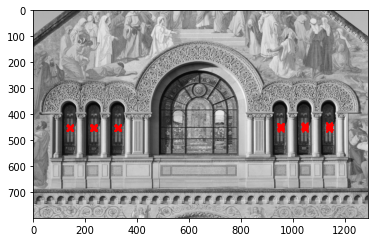

In [138]:
y,x=np.nonzero(np.logical_and(np.abs(location)>np.amax(np.abs(location))*0.85,np.abs(location)<np.amax(np.abs(location))*0.86))
plt.imshow(target,cmap='gray')
plt.scatter(x,y,color='red',marker='x')
plt.show()

In [12]:

revised_x,revised_y=[],[]

def check_existance(x,y,list_x,list_y):
    return x in list_x and y in list_y
    

for i in range(len(x)):
    print("POINT => ",x[i],",",y[i])
    for j in range(len(x)):
        distance = np.sqrt((x[i]-x[j])**2+(y[i]-y[j])**2)
        if distance<900 and distance>800 and check_existance(x[j],y[j],revised_x,revised_y)==False:
            revised_x.append(x[j])
            revised_y.append(y[j])
            print(distance)


POINT =>  1046 , 443
813.0301347428642
814.0393110900726
812.0394079107244
815.049691736645
811.0499368103052
815.0613473843549
POINT =>  1139 , 443
813.022139919941
814.0300977236652
811.0394565001138
815.049691736645
814.0743209314492
812.0886651099128
POINT =>  1140 , 443
POINT =>  952 , 444
812.0301718532385
811.0302090551252
813.0393594408575
POINT =>  953 , 444
POINT =>  1045 , 444
POINT =>  1138 , 445
POINT =>  1141 , 445
POINT =>  954 , 446
POINT =>  951 , 447
POINT =>  1044 , 448
POINT =>  1048 , 448
POINT =>  326 , 449
813.022139919941
814.0221127217613
812.0098521569797
815.0098158918088
816.0
813.0301347428642
POINT =>  1142 , 449
POINT =>  233 , 450
813.0301347428642
812.0221671851083
811.0024660874959
815.0024539840356
814.0221127217613
POINT =>  325 , 450
POINT =>  955 , 450
POINT =>  1142 , 450
POINT =>  140 , 451
812.0301718532385
813.0301347428642
814.0153561205095
811.0098643049911
815.0006134967016
POINT =>  141 , 451
POINT =>  232 , 451
POINT =>  234 , 451
POINT =>

In [13]:
revised_x,revised_y

([233,
  232,
  234,
  231,
  235,
  231,
  326,
  325,
  328,
  324,
  325,
  327,
  140,
  141,
  139,
  1139,
  1140,
  1138,
  1141,
  1142,
  1139,
  1046,
  1045,
  1044,
  1048,
  1047,
  952,
  953,
  954,
  951,
  955],
 [450,
  451,
  451,
  452,
  452,
  453,
  449,
  450,
  451,
  452,
  454,
  455,
  451,
  451,
  452,
  443,
  443,
  445,
  445,
  449,
  456,
  443,
  444,
  448,
  448,
  456,
  444,
  444,
  446,
  447,
  450])

In [14]:
len(revised_y)

31

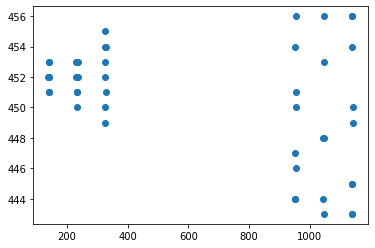

In [43]:
plt.scatter(x,y)

In [148]:
r2mx,r2my,r2x,r2y=[],[],[],[]
for i in range(len(y)):
    for j in range(len(y)):
        if np.abs(x[i]-x[j])>20:
            if x[i] not in r2mx and y[i] not in r2my:
                r2mx.append(x[i])
                r2my.append(y[i])

for i in range(len(r2mx)):
    for j in range(len(r2mx)):
        if np.abs(r2my[i]-r2my[j])>2:
            if r2my[i] not in r2y and r2mx[i] not in r2x:
                r2x.append(r2mx[i])
                r2y.append(r2my[i])

In [149]:
len(r2x)

14

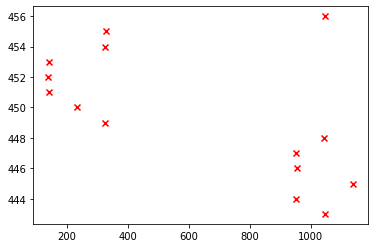

In [150]:
#plt.imshow(target,cmap='gray')
plt.scatter(r2x,r2y,color='red',marker='x')

In [119]:
len(revised_x)

0

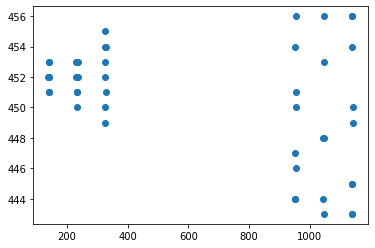

In [151]:
plt.scatter(x,y)

In [255]:
rrx,rry=[],[]
k,l=0,0
for k in range(len(x)):
    for l in range(len(x)):
        if np.abs(y[k]-y[l])>5 and (y[k] not in rry and y[k]+1 not in rry and y[k]+2 not in rry):
            if np.abs(x[k]-x[l])>50 and (x[k] not in rrx and x[k]+1 not in rrx and x[k]+2 not in rrx and
                                        x[k]+5 not in rrx and x[k]+4 not in rrx and x[k]+3 not in rrx and
                                        x[k] not in rrx and x[k]-1 not in rrx and x[k]-2 not in rrx):
                print(np.abs(x[k]-x[l]),end=" ")
                rrx.append(x[k])
                rry.append(y[k])

720 719 998 720 813 906 

In [256]:
len(rrx)

6

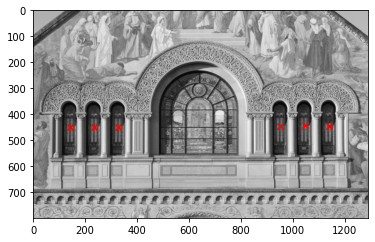

In [258]:
plt.imshow(target,cmap='gray')
plt.scatter(rrx,rry,marker='x',color='red')
plt.show()


In [2]:
target = cv2.imread("text.png")
target = cv2.cvtColor(target,cv2.COLOR_BGR2GRAY)
template = cv2.imread("temp.png")
template = cv2.cvtColor(template,cv2.COLOR_BGR2GRAY)

/tmp/ipykernel_113281/2069452115.py:9: RuntimeWarning: invalid value encountered in double_scalars
  loc[i+int(template_size[0]/2)][j+int(template_size[1]/2)] = np.sum((np.mean(np.mean(target[i:i+template_size[0],j:j+template_size[1]]))-target[i:i+template_size[0],j:j+template_size[1]])*delta_template)/np.sqrt(np.std(target[i:i+template_size[0],j:j+template_size[1]])**2*np.std(delta_template)**2)


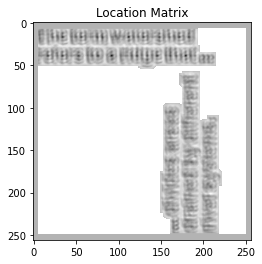

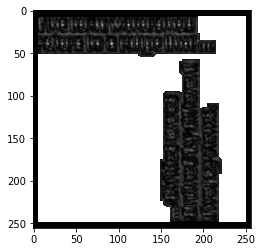

In [261]:
template_size = template.shape
location = np.abs(location_finder(target.copy(),template.copy()))
plt.imshow(location,cmap='gray')
plt.show()

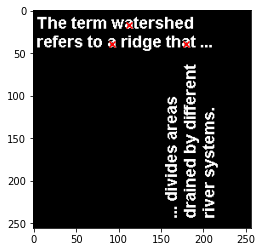

In [294]:

location = np.nan_to_num(location)
y,x=np.nonzero(np.abs(location)>np.amax(np.abs(location))*0.95)
plt.imshow(target,cmap='gray')
plt.scatter(x,y,color='red',marker='x')
plt.show()

In [284]:
x

array([112,  92, 179])

In [54]:
def template_finder(target,template):
    target = cv2.imread(target)
    target = cv2.cvtColor(target,cv2.COLOR_BGR2GRAY)
    template = cv2.imread(template)
    template = cv2.cvtColor(template,cv2.COLOR_BGR2GRAY)
    template_size = template.shape
    location = np.abs(location_finder(target.copy(),template.copy()))
    location = np.nan_to_num(location)
    y,x=np.nonzero(np.abs(location)>np.amax(np.abs(location))*0.95)

    
    rot_template = rotate_temp(template[1:a.shape[0]-2,:])
    location = np.abs(location_finder(target.copy(),rot_template.copy()))
    location = np.nan_to_num(location)
    yr,xr=np.nonzero(np.abs(location)>np.amax(np.abs(location))*0.95)
    plt.imshow(target,cmap='gray')
    plt.scatter(x,y,color='red',marker='x')
    plt.scatter(xr,yr,color='red',marker='x')

    plt.show()
    
    return (x,y)

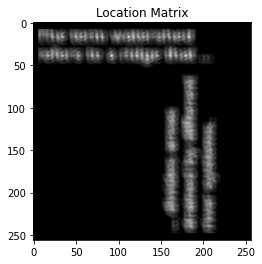

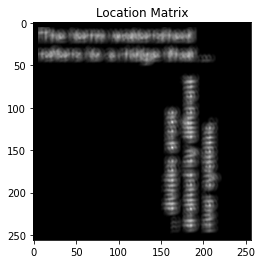

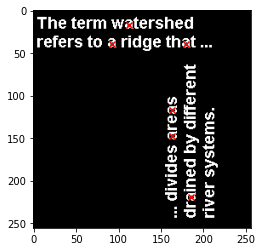

In [55]:
temp = template_finder("text.png",'temp.png')

In [49]:
def rotate_temp(t):
    x=np.zeros(t.shape[::-1])
    for i in range(t.shape[0]):
        for j in range(t.shape[1]):
            x[i,j] = t[j][t.shape[0]-1-i]
    return x

def location_finder(target,template):
    loc=np.zeros(target.shape)
    template_size=template.shape
    for i in range(0,target.shape[0]-template_size[0]):
        for j in range(0,target.shape[1]-template_size[1]):
            if template_size[0]%2==0 and template_size[1]%2!=0:
                loc[i+int(template_size[0]/2)][j+int(template_size[1]/2)] = np.sum(target[i:i+template_size[0],j:j+template_size[1]]*template)
            elif template_size[0]%2==0 and template_size[1]%2==0:
                loc[i+int(template_size[0]/2)][j+int(template_size[1]/2)] = np.sum(target[i:i+template_size[0],j:j+template_size[1]]*template)
            elif template_size[0]%2!=0 and template_size[1]%2==0:
                loc[i+int(template_size[0]/2)][j+int(template_size[1]/2)] = np.sum(target[i:i+template_size[0],j:j+template_size[1]]*template)
            else:
                loc[i+int(template_size[0]/2)][j+int(template_size[1]/2)] = np.sum(target[i:i+template_size[0],j:j+template_size[1]]*template)
    
    plt.imshow(loc,cmap='gray')
    plt.title("Location Matrix")
    plt.show()
    return loc

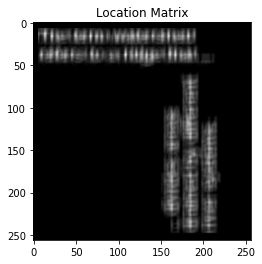

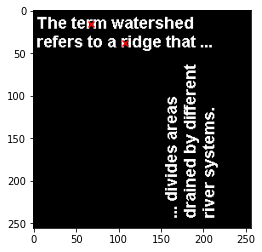

In [25]:
temp2 = template_finder('text.png','temp2.png')

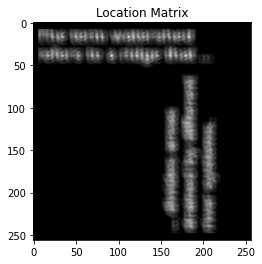

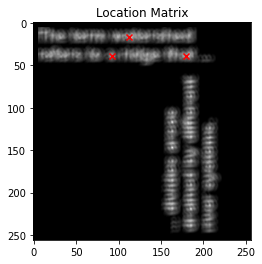

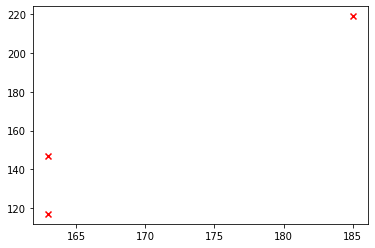

In [53]:
temp2 = template_finder('text.png','temp.png')

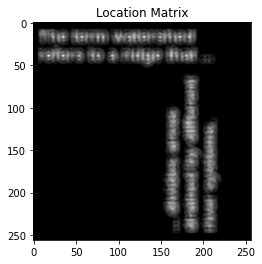

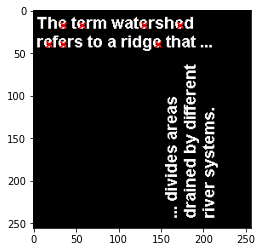

In [27]:
temp2 = template_finder('text.png','temp3.png')

In [33]:
a=cv2.imread("temp.png",0)

In [42]:
t = a[1:a.shape[0]-2,:]
t.shape

(13, 13)

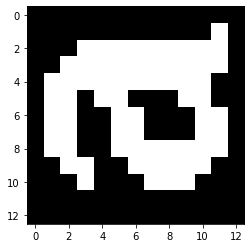

In [48]:
x=np.zeros(t.shape[::-1])
for i in range(t.shape[0]):
    for j in range(t.shape[1]):
        x[i,j] = t[j][t.shape[0]-1-i]
plt.imshow(x,cmap='gray')